# Table of Contents
01. Import Libraries and Data
02. Addressing PII Data Privacy
03. Creating Regional Segmentation of the Data
04. Excluding Low activity Customers
05. Customer Profiling
06. Visualizations
07. Aggregate Frequency of Usage and Expenditure.
08. & 09. Customers Profiles Across Regions and Departments with Visualizations
10. Export Data

### 1. Importing Libraries and Data 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
# Import pickle file
path = "/Users/drich/Desktop/06-09-2023 Instacart Basket Analysis"
df_all = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

### 2. Data Privacy

Security related data pertaining to customers (name, address, email, etc.), also known as PII will be purged from database. This is to be in adherence of data privacy and security regulatory proccesses.

In [3]:
# Check dataframe information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_following_previous_order  float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   Unnamed: 0_y                   int64   
 10  product_name                   object  
 11  aisle_id                       int64   
 12  department_id                  int64   
 13  prices                         float64 
 14  _merge                         category
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

In [4]:
# Drop first name (PII) column from dataframe.
df_all = df_all.drop(columns = ['first_name'])

In [5]:
# Drop surname (PII) column from dataframe.
df_all = df_all.drop(columns = ['surname'])

In [6]:
# Check the results
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_following_previous_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3. Creating Regional Segmentation.

In [7]:
# Define regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Create region column based on state column.
df_all.loc[df_all['state'].isin (Northeast), 'region'] = 'Northeast'
df_all.loc[df_all['state'].isin (Midwest), 'region'] = 'Midwest'
df_all.loc[df_all['state'].isin (South), 'region'] = 'South'
df_all.loc[df_all['state'].isin (West), 'region'] = 'West'

In [9]:
# Checking new column.
df_all[['user_id', 'region', 'state']].head(20)

,user_id,region,state
0,1,South,Alabama
1,1,South,Alabama
2,1,South,Alabama
3,1,South,Alabama
4,1,South,Alabama
5,1,South,Alabama
6,1,South,Alabama
7,1,South,Alabama
8,1,South,Alabama
9,1,South,Alabama


In [10]:
# checking the shape of dataframe
df_all.shape

(32434212, 32)

In [11]:
df_all['region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [12]:
# Check spending habits of customers by regions.
spending_habits = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Spending Habits by Regions')

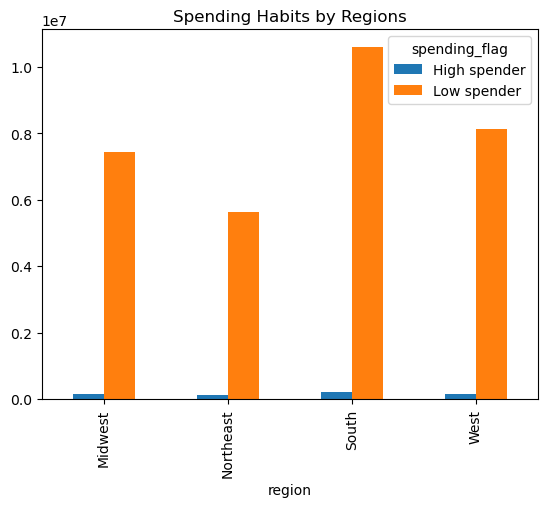

In [13]:
bar_regions = spending_habits.plot.bar()
plt.title('Spending Habits by Regions')

In [14]:
# Export bar chart
bar_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'Spending_habits.png'))

### 4. Excluding Low Activity Customers

In [15]:
# Create flag for customers w/ less than 5 orders
df_all.loc[df_all['max_order'] >= 5, 'customer_activity'] = 'High active'

In [16]:
df_all.loc[df_all['max_order'] <5, 'customer_activity'] = 'Low active'

In [17]:
# Check value counts in customer_activity column
df_all['customer_activity'].value_counts(dropna = False)

High active    30992664
Low active      1441548
Name: customer_activity, dtype: int64

In [18]:
# Create Subset for low active customer
low_active_customers = df_all[df_all['customer_activity'] == 'Low active']

In [19]:
low_active_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_following_previous_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
1513,520620,120,1,3,11,NaN,196,2,0,195,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1514,3273029,120,3,2,8,19.0,196,2,1,195,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1515,520620,120,1,3,11,NaN,46149,1,0,46153,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1516,3273029,120,3,2,8,19.0,46149,1,1,46153,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1517,520620,120,1,3,11,NaN,26348,3,0,26349,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active


In [20]:
# Export Subset 'low_active_customers' dataframe
low_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_activity_customers.pkl'))

In [21]:
# Assign high active flag to dataframe
high_active_customers = df_all[df_all['customer_activity'] == 'High active']

In [22]:
# Check shape
high_active_customers.shape

(30992664, 33)

In [23]:
low_active_customers.shape

(1441548, 33)

In [24]:
# Exporting 'high_active_customers' dataframe
high_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

### 5. Customer Profiling

##### Age Groups of Customers

In [25]:
# Further analysis w/ new 'high_active_customers' Dataframe.
df_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

In [26]:
# Check the frequency of 'age' column.
df_new['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
# Create age category column
df_new.loc[(df_new['age'] >35) & (df_new['age'] <60), 'age_category'] = 'Middle-aged Adults'
df_new.loc[df_new['age'] >60, 'age_category'] = 'Senior Citizens'
df_new.loc[df_new['age'] <=35, 'age_category'] = 'Young Adults'

In [28]:
# Check results
df_new['age_category'].value_counts(dropna = False)

Middle-aged Adults    11661944
Senior Citizens       10121613
Young Adults           8746779
NaN                     462328
Name: age_category, dtype: int64

In [29]:
df_new.shape

(30992664, 34)

##### Customer Income

In [30]:
# Check frequency for 'income' column
df_new['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [31]:
# Create flag for 'income' column
df_new.loc[(df_all['income'] >=25900) & (df_new['income'] <100000), 'income_class'] = 'Lower-income'
df_new.loc[(df_new['income'] >=100000) & (df_new['income'] <=200000), 'income_class'] = 'Middle-income'
df_new.loc[df_new['income'] >200000, 'income_class'] = 'Upper_income'

In [32]:
# Check result
df_new['income_class'].value_counts(dropna = False)

Lower-income     16773245
Middle-income    13965129
Upper_income       254290
Name: income_class, dtype: int64

##### Department

In [33]:
#Import department data to get dept. names
df_dep =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [34]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# Renaming column
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [36]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
# Check key column: merge dataframe
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [38]:
# Drop '_merge' column from 'df_new' dataframe
df_new = df_new.drop(columns = ['_merge'])

In [39]:
# Merge departments dataframe w/ high_active_customers 
df_merged = df_new.merge(df_dep, on = 'department_id')

In [40]:
# Check merge result
df_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,1,7,beverages
1,1,7,beverages
2,1,7,beverages
3,1,7,beverages
4,1,7,beverages
5,1,7,beverages
6,1,7,beverages
7,1,7,beverages
8,1,7,beverages
9,1,7,beverages


##### Dependants

In [41]:
# Check frequency for dependents column.
df_merged['n_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [42]:
# Check marital status column
df_merged['fam_status'].value_counts(dropna = False)

married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: fam_status, dtype: int64

In [43]:
# Create flag for dependents in each household

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] ==0), 'customer_profile'] = 'Single adult'

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['n_dependants'] >0), 'customer_profile'] = 'Young parent'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] <=2), 'customer_profile'] = 'Family'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['n_dependants'] >2), 'customer_profile'] = 'Big Family'

In [44]:
# Check result
df_merged[['fam_status', 'n_dependants', 'customer_profile']].head(30)

,fam_status,n_dependants,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,married,3,Big Family
4,married,3,Big Family
5,married,3,Big Family
6,married,3,Big Family
7,married,3,Big Family
8,married,3,Big Family
9,married,3,Big Family


In [45]:
df_merged['customer_profile'].value_counts(dropna = False)

Family          14472584
Single adult     7747032
Big Family       7290437
Young parent     1482611
Name: customer_profile, dtype: int64

In [46]:
df_merged.shape

(30992664, 36)

### 6. Visualizations

Text(0.5, 1.0, 'Distribution of Age Groups')

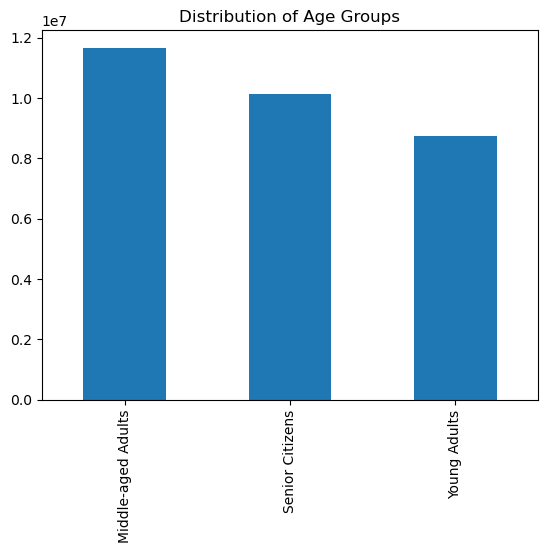

In [47]:
# Create bar chart of 'age_category' 
bar_age_category = df_merged['age_category'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [48]:
# Export bar chart
bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png'))

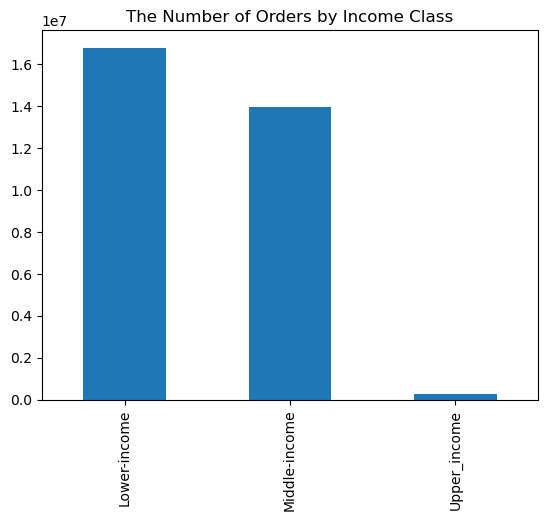

In [49]:
# Bar chart for income_class
bar_income_class = df_merged['income_class'].value_counts().plot.bar(title ='The Number of Orders by Income Class')

In [50]:
# Export Bar chart
bar_income_class.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_class'))

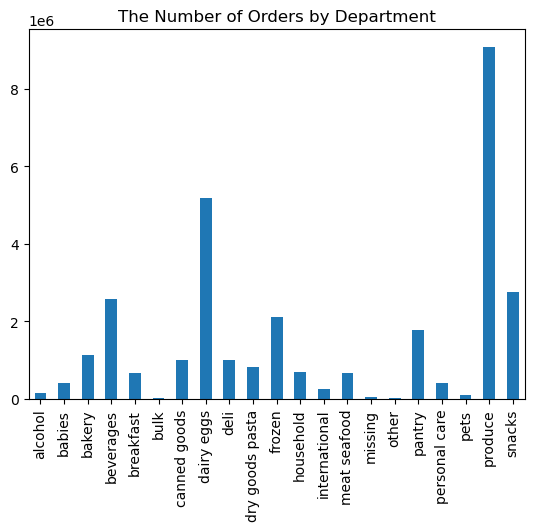

In [51]:
# Create department bar chart
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [52]:
# Export bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

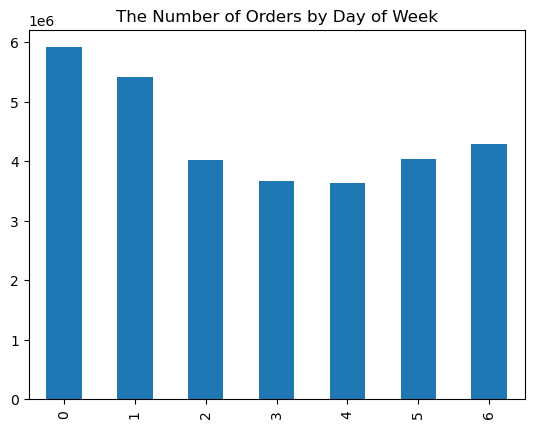

In [53]:
# Create day of week bar chart
bar_day_of_week = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Day of Week')

In [54]:
# Export bar chart
bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_of_week.png'))

In [89]:
# Checking prices distribution

df_all.agg({'prices': ['min', 'mean', 'max']}).to_clipboard()

In [93]:
# Assigning range groupings
df_all.loc[df_all['prices'] <= 5, 'product_price_range'] = 'low price'
df_all.loc[(df_all['prices'] > 5) & (df_all['prices'] < 19), 'product_price_range'] = 'mid price'
df_all.loc[df_all['prices'] >= 20, 'product_price_range'] = 'high price'

In [94]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_following_previous_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity,product_price_range
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High active,mid price
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High active,mid price
2,473747,1,3,3,12,21.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High active,mid price
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High active,mid price
4,431534,1,5,4,15,28.0,196,1,1,195,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High active,mid price


Text(0.5, 1.0, 'Price Grouping - Counts of Each Group')

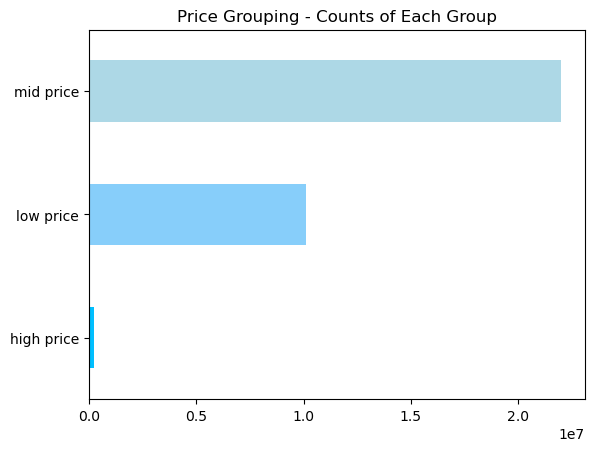

In [95]:
price_range = df_all['product_price_range'].value_counts().plot.barh(color = ['lightblue', 'lightskyblue', 'deepskyblue'])
plt.gca().invert_yaxis()
plt.title("Price Grouping - Counts of Each Group")

In [96]:
price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range.png'))

In [98]:
# Calculate percentage of groups relative to total
price_counts = df_all['product_price_range'].value_counts()
total_rows = len(df_all)
percentage_of_whole = (price_counts / total_rows) * 100
percentage_of_whole

mid price     67.877006
low price     31.221304
high price     0.734185
Name: product_price_range, dtype: float64

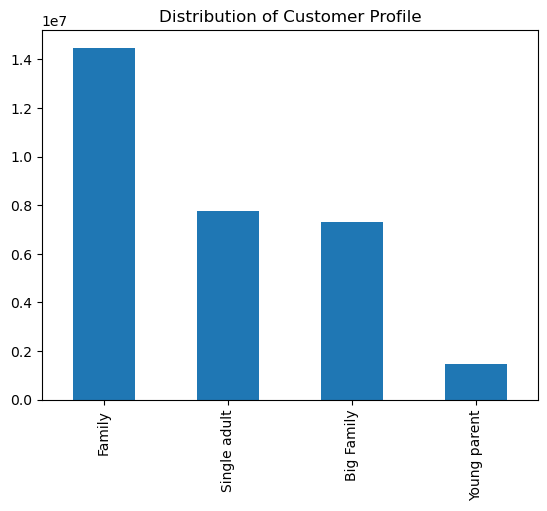

In [55]:
# Create bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [56]:
# Export bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

### 7. Aggregate Frequency of Usage and Expenditure

##### Customer Age Group

In [57]:
# Aggregate min, max, mean for customer 'age_category' (expenditure & usage)
age_cat_agg = df_merged.groupby('age_category',)[['days_following_previous_order','prices']].agg(['min','max','mean'])

In [58]:
age_cat_agg

days_following_previous_order                  prices  \
                                             min   max       mean    min   
age_category                                                               
Middle-aged Adults                           0.0  30.0  10.805116    1.0   
Senior Citizens                              0.0  30.0  10.792197    1.0   
Young Adults                                 0.0  30.0  10.828816    1.0   

                                        
                        max       mean  
age_category                            
Middle-aged Adults  99999.0  12.010996  
Senior Citizens     99999.0  11.807290  
Young Adults        99999.0  12.085154

In [59]:
# Aggregate min, max, mean for customer 'income_class'
income_class_agg = df_merged.groupby('income_class',)[['days_following_previous_order','prices']].agg(['min','max','mean'])

In [60]:
income_class_agg

days_following_previous_order                  prices           \
                                        min   max       mean    min      max   
income_class                                                                   
Lower-income                            0.0  30.0  10.844737    1.0  99999.0   
Middle-income                           0.0  30.0  10.782397    1.0  99999.0   
Upper_income                            0.0  30.0  10.092341    1.0  99999.0   

                           
                     mean  
income_class               
Lower-income     8.099121  
Middle-income   12.123096  
Upper_income   254.561096

Note: Are the mean prices so varied because of income class? This is a large variation but it is possible because it descends in unison with income classes accordingly. 

In [61]:
# Aggregate min, max, & mean on customer 'customer_profile'
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_following_previous_order','prices']].agg(['min','max','mean'])

In [62]:
customer_profile_agg

days_following_previous_order                  prices  \
                                           min   max       mean    min   
customer_profile                                                         
Big Family                                 0.0  30.0  10.826198    1.0   
Family                                     0.0  30.0  10.818535    1.0   
Single adult                               0.0  30.0  10.791750    1.0   
Young parent                               0.0  30.0  10.750739    1.0   

                                      
                      max       mean  
customer_profile                      
Big Family        99999.0  11.806975  
Family            99999.0  12.015009  
Single adult      99999.0  12.103485  
Young parent      99999.0  10.892382

##### Departments

In [63]:
# Aggregate min, max & mean for customer 'customer_profile'
dep_cus_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_following_previous_order','prices']].agg(['min','max','mean'])

In [64]:
dep_cus_profile_agg

days_following_previous_order                   \
                                                         min   max       mean   
customer_profile department                                                     
Big Family       alcohol                                 0.0  30.0   9.874774   
                 babies                                  0.0  30.0   9.612820   
                 bakery                                  0.0  30.0  10.800523   
                 beverages                               0.0  30.0  10.813165   
                 breakfast                               0.0  30.0  11.043296   
...                                                      ...   ...        ...   
Young parent     pantry                                  0.0  30.0  10.576977   
                 personal care                           0.0  30.0  11.315281   
                 pets                                    0.0  30.0  11.389847   
                 produce                                 0.0  30.0  10.569925   
                 snacks                                  0.0  30.0  10.611435   

                               prices                  
                                  min   max      mean  
customer_profile department                            
Big Family       alcohol          1.0  15.0  8.260851  
                 babies           1.0  15.0  7.658709  
                 bakery           1.0  15.0  7.879297  
                 beverages        1.0  15.0  7.667451  
                 breakfast        1.0  14.9  8.050888  
...                               ...   ...       ...  
Young parent     pantry           1.0  20.0  8.017662  
                 personal care    1.0  15.0  7.938779  
                 pets             1.0  15.0  7.918097  
                 produce          1.0  15.0  8.003058  
                 snacks           1.6   7.0  4.265732  

[84 rows x 6 columns]

### Steps 8 and 9. Profiles of Customers by Regional Distinction & Appropriate Visualizations

In [65]:
# Check relationship of 'age_category' , 'income_class' for cust. profile in diff. regions
profile_age_reg = df_merged.groupby('region')[['income_class','age_category']].value_counts().reset_index(name='count')

In [66]:
# Check result
profile_age_reg

,region,income_class,age_category,count
0,Midwest,Lower-income,Young Adults,1948733
1,Midwest,Middle-income,Senior Citizens,1635998
2,Midwest,Middle-income,Middle-aged Adults,1569328
3,Midwest,Lower-income,Middle-aged Adults,1194104
4,Midwest,Lower-income,Senior Citizens,695028
5,Midwest,Middle-income,Young Adults,62600
6,Midwest,Upper_income,Senior Citizens,27570
7,Midwest,Upper_income,Middle-aged Adults,26729
8,Midwest,Upper_income,Young Adults,8864
9,Northeast,Lower-income,Young Adults,1513024


In [67]:
# Check income_class based on region
region_income = pd.crosstab(df_merged['income_class'],df_merged['region'], dropna = False)

In [68]:
region_income

region,Midwest,Northeast,South,West
income_class,,,,
Lower-income,3864923,2951162,5652681,4304479
Middle-income,3338661,2478783,4584273,3563412
Upper_income,64123,40123,83508,66536


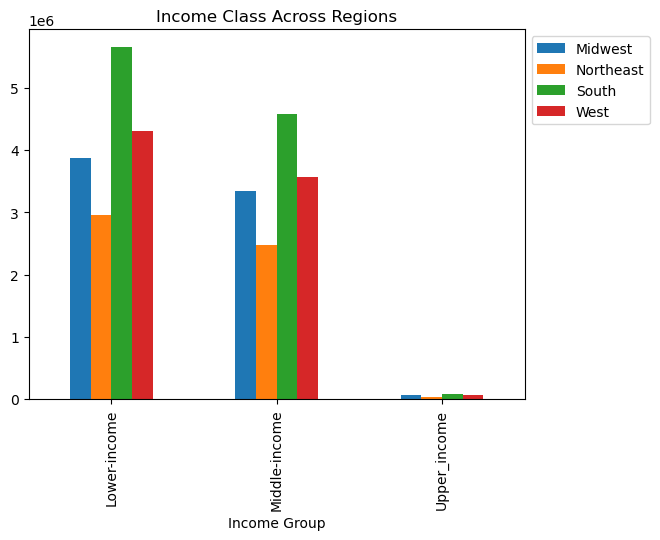

In [69]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [70]:
# Exporting bar chart

bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [71]:
# Create a stacked bar chart for 'departments' & 'customers_profile' relationship
customer_fam_dep = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

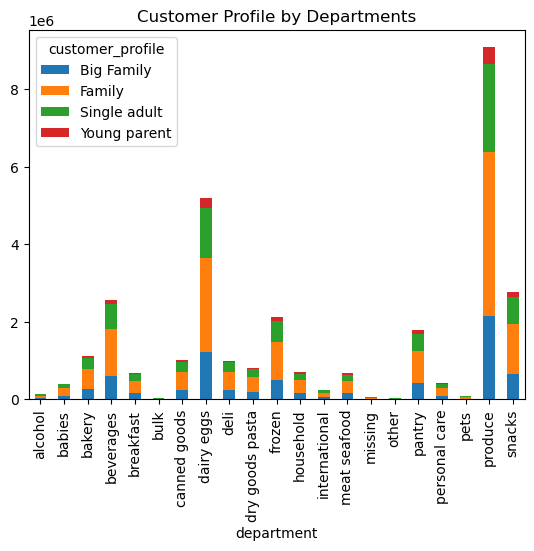

In [72]:
# Stacked bar
stacked_cust_dept = customer_fam_dep.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [73]:
# Exporting stacked bar
stacked_cust_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_cust_dept.png'))

In [74]:
# Creating crosstab, accounting for occurrences of age categories for all departments
cross_tab = pd.crosstab(df_merged['department'], df_merged['age_category'])

<Figure size 1200x600 with 0 Axes>

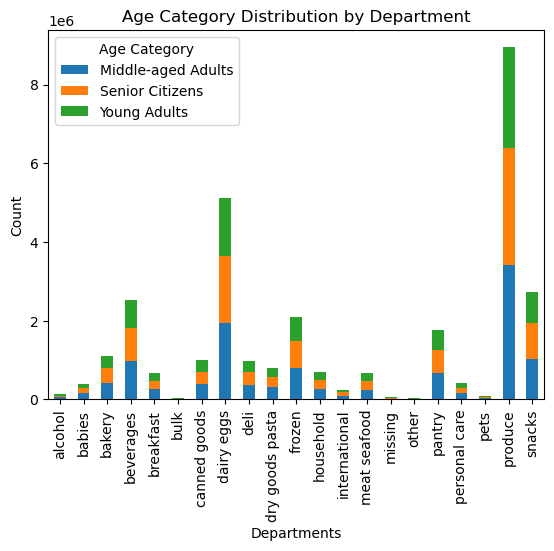

In [75]:
# Create clustered bar
plt.figure(figsize=(12, 6))
clustered_age_dept = cross_tab.plot(kind='bar', stacked=True, title='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Category')

In [76]:
# Export clustered bar
clustered_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_age_dept.png',))

In [77]:
# Check customer_profile: region
cust_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [78]:
cust_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1673042,1293051,2427766,1896578
Family,3418486,2564406,4802439,3687253
Single adult,1824487,1355828,2584352,1982365
Young parent,351692,256783,505905,368231


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

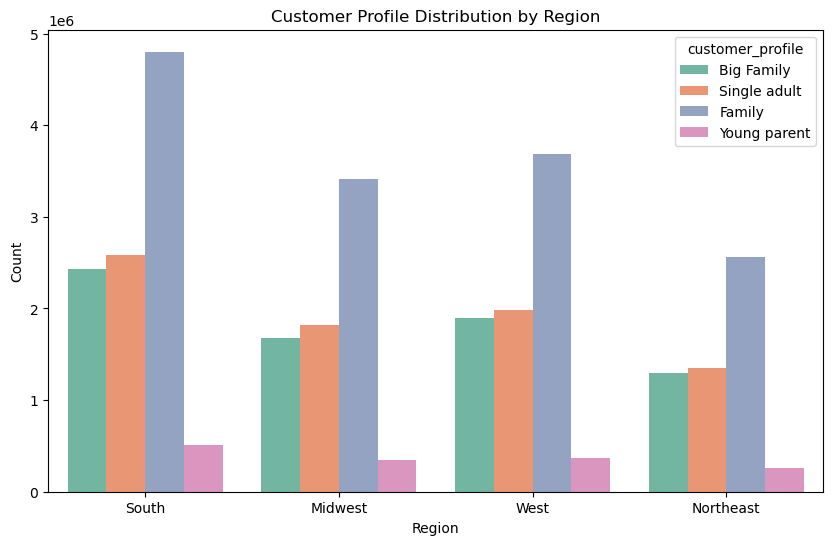

In [79]:
# Creating countplot: visualize distribution for 'customer_profile' for all 'regions'

plt.figure(figsize=(10, 6))
countplot_profile_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [80]:
# Export countplot bar
countplot_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Countplot_Customer_Profile_Region_Relationship.png'))

### 10. Tidy Up and Export

In [81]:
df_merged.shape

(30992664, 36)

In [82]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 30992663
Data columns (total 36 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        int64  
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   order_hour_of_day              int64  
 5   days_following_previous_order  float64
 6   product_id                     int64  
 7   add_to_cart_order              int64  
 8   reordered                      int64  
 9   Unnamed: 0_y                   int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  

In [83]:
df_merged.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_following_previous_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,date_joined,n_dependants,fam_status,income,region,customer_activity,age_category,income_class,department,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
1,2398795,1,2,3,7,15.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
2,473747,1,3,3,12,21.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
3,2254736,1,4,4,7,29.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
4,431534,1,5,4,15,28.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
5,3367565,1,6,2,7,19.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
6,550135,1,7,1,9,20.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
7,3108588,1,8,1,14,14.0,196,2,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
8,2295261,1,9,1,16,0.0,196,4,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family
9,2550362,1,10,4,8,30.0,196,1,1,195,...,2/17/2019,3,married,40423,South,High active,Young Adults,Lower-income,beverages,Big Family


In [84]:
# Export Dataframe

df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_dept_merged.pkl'))